---
title: "PM"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [1]:
from util import Skim
from util import SkimCompare

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
base_skim = Skim() #no label initially
#read 5 matrices from transit AM skims
base_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2',
    skim='transit',
    time_periods='PM',
    desc_label='EMME 4.3.7 Base year scenario'
)

In [5]:
comp_skim = Skim()
comp_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1522_toreroV2',
    skim='transit',
    time_periods='PM',
    desc_label='OpenPaths Base year scenario'
)

In [6]:
print('Scenarios to be compared: ' + base_skim.desc_label + ' VS ' + comp_skim.desc_label)

Scenarios to be compared: EMME 4.3.7 Base year scenario VS OpenPaths Base year scenario


In [7]:
# generate comparison
comparison = SkimCompare.comparison(base_skim.skim_df, comp_skim.skim_df)

# Scatterplot Comparison of PM Peak for WALK PRM modes assignment

Scatterplot comparison of PM Peak total actual in-vehicle travel time by walk premium

Intercept: 0.0070
Slope: 0.9924
R² Score: 0.9995
RMSE: 0.5857


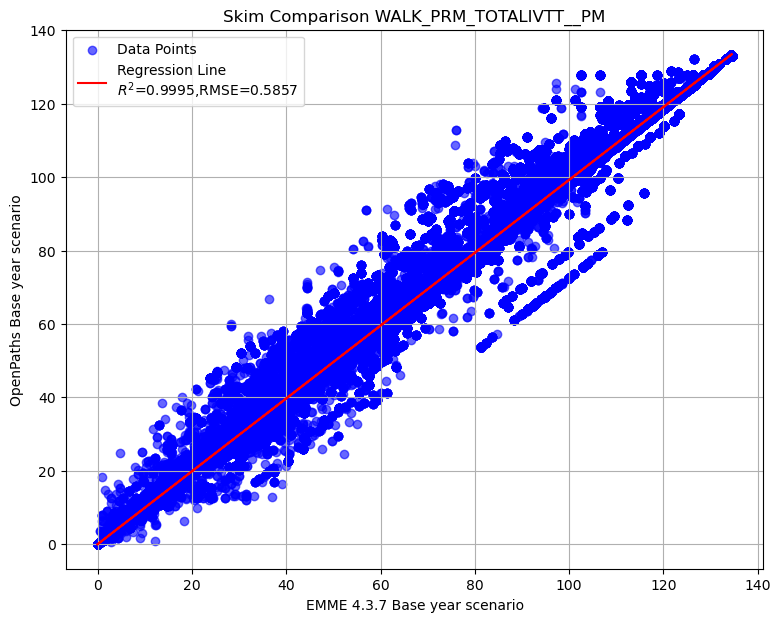

In [8]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_PRM_TOTALIVTT__PM')

Scatterplot comparison of PM Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: 0.0040
Slope: 0.9950
R² Score: 0.9974
RMSE: 0.6290


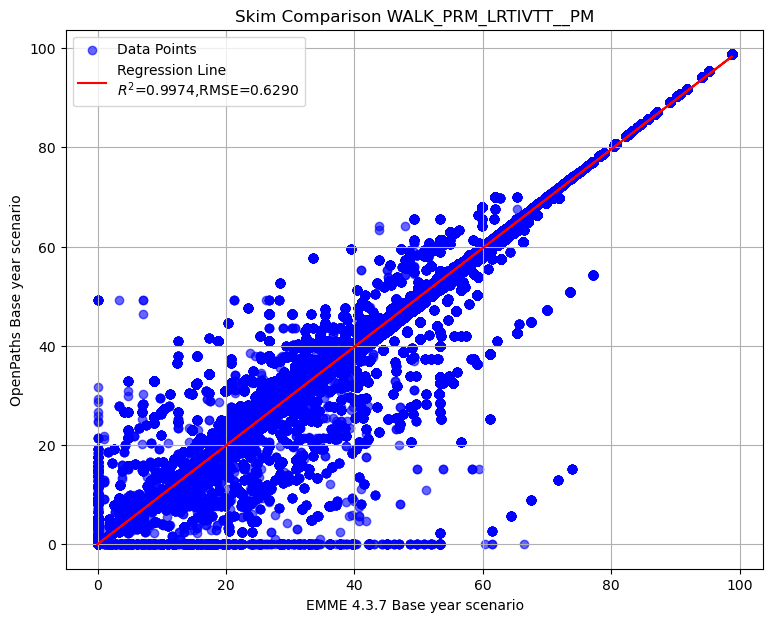

In [9]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_PRM_LRTIVTT__PM')

Scatterplot comparison of PM Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: 0.0019
Slope: 0.9851
R² Score: 0.9892
RMSE: 0.8708


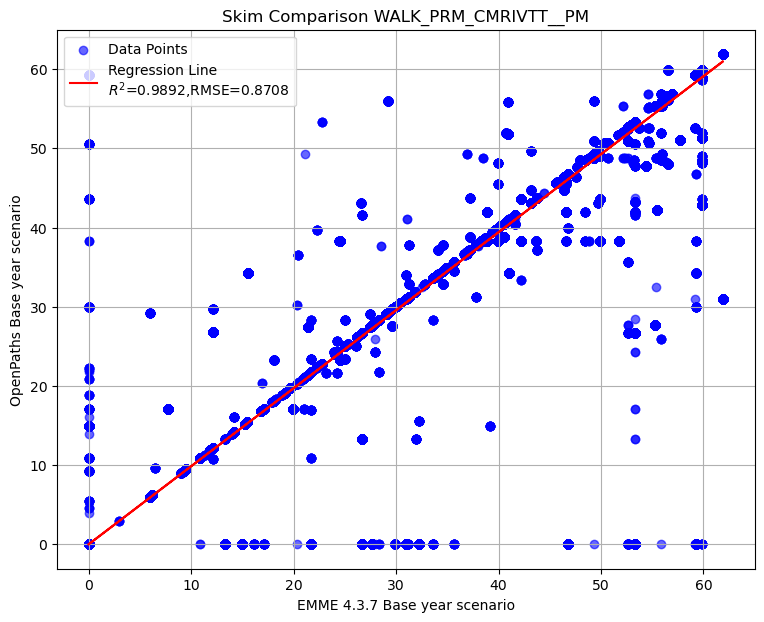

In [10]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_PRM_CMRIVTT__PM')

Scatterplot comparison of PM Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: 0.0126
Slope: 0.9755
R² Score: 0.9894
RMSE: 0.6729


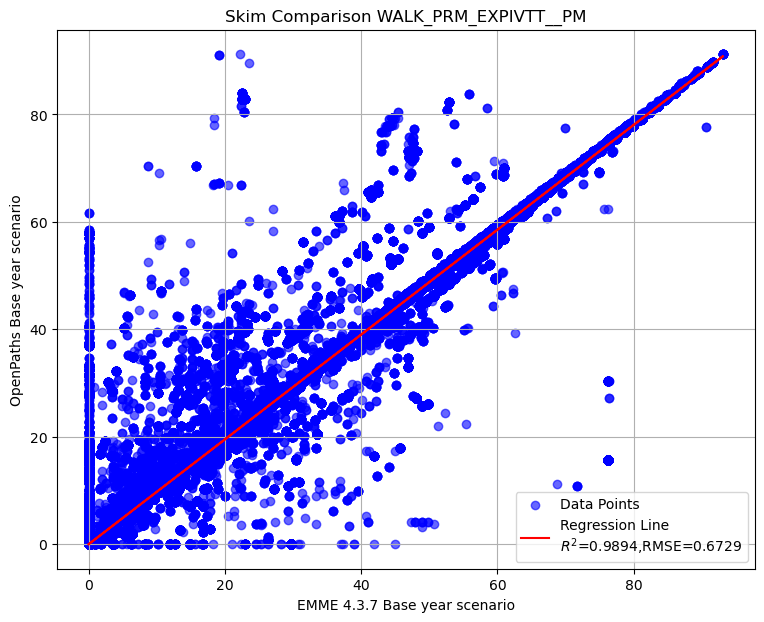

In [11]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_PRM_EXPIVTT__PM')

Scatterplot comparison of PM Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: 0.0335
Slope: 0.9873
R² Score: 0.9941
RMSE: 1.1278


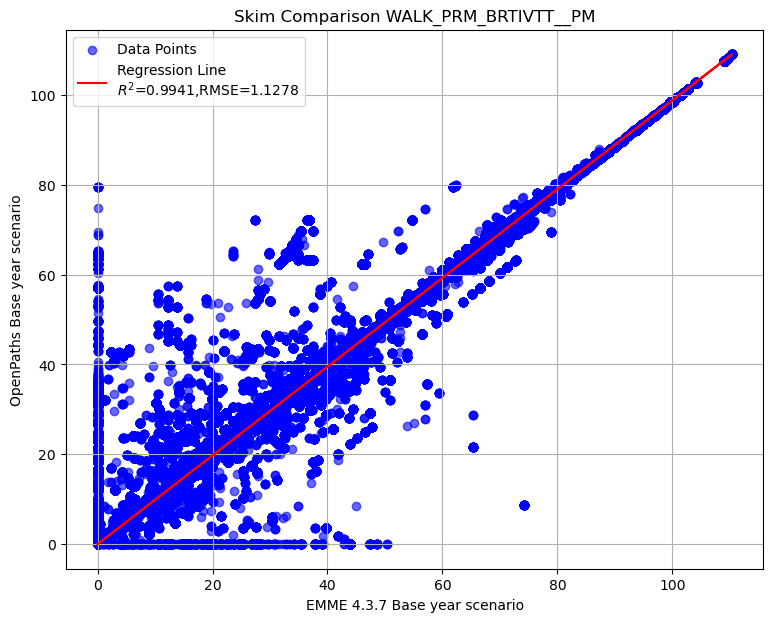

In [12]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_PRM_BRTIVTT__PM')

Intercept: 0.0303
Slope: 0.9936
R² Score: 0.9999
RMSE: 0.6129


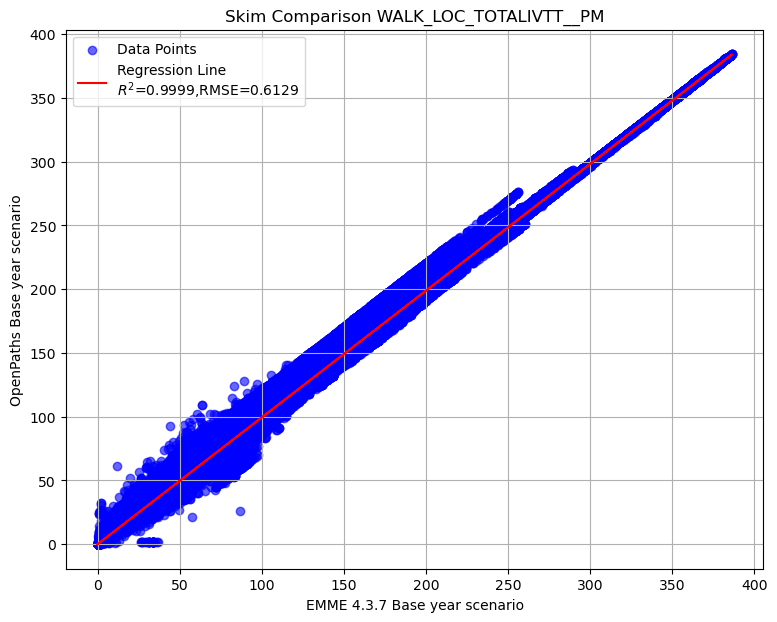

In [13]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_LOC_TOTALIVTT__PM')

Intercept: 0.0770
Slope: 0.9928
R² Score: 0.9974
RMSE: 2.4413


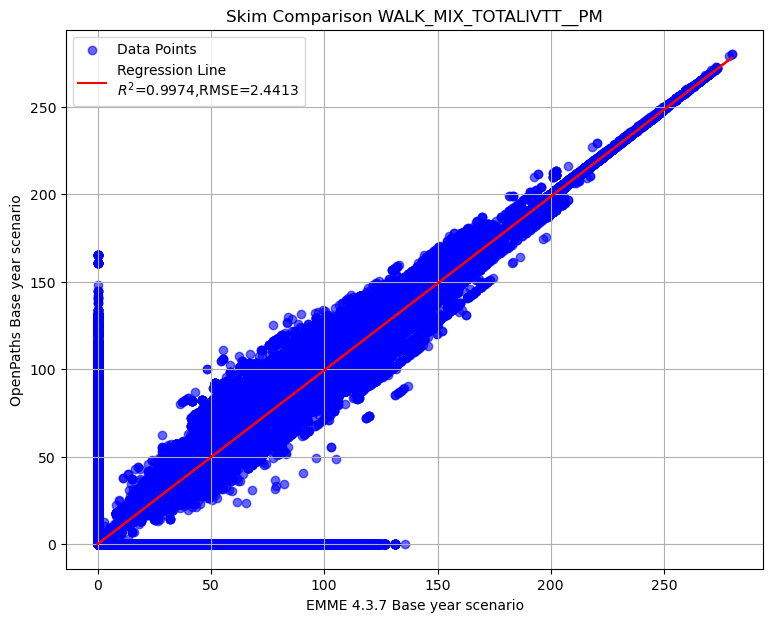

In [14]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_MIX_TOTALIVTT__PM')

# Summary of transit PM skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__PM)

In [15]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__PM', ascending=False).head().round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM
51,2191,36.74,42.12,-52.63,8.97,38.28,-0.95,-0.33
51,2226,36.74,42.12,-52.63,8.97,38.28,-0.95,-0.33
1835,2849,34.16,0,0,71.97,-37.81,0,0
1835,2896,34.16,0,0,71.97,-37.81,0,0
1835,3093,34.16,0,0,71.97,-37.81,0,0


Below is the summary of select matrices difference in transit PM skim

In [16]:
comparison_excluded = comparison.drop(columns=['Origin', 'Destination'])
desc = comparison_excluded.describe().applymap(lambda x: f"{x:,.2f}").style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
)
desc

,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM
count,"24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00"
mean,-0.09,-0.02,-0.02,-0.02,-0.03,-0.47,-0.21
std,0.62,0.63,0.88,0.69,1.14,0.82,2.47
min,-27.77,-66.45,-59.88,-60.92,-65.61,-60.45,-135.80
25%,0.00,0.00,0.00,0.00,0.00,-1.05,-0.23
50%,0.00,0.00,0.00,0.00,0.00,-0.10,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,36.74,49.24,59.22,71.97,79.44,49.22,165.12


Let's check the records with difference in WALK_PRM_LRTIVTT__PM greater than 45

In [17]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__PM']>45].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM
50,2764,11.45,49.24,-52.63,-38.89,53.72,-1.33,0
51,2479,22.88,49.24,-59.22,0,32.86,-1.06,0
51,2757,20.03,49.24,-59.22,0,30.01,-1.19,0
70,2762,14.75,49.24,-49.33,-38.89,53.72,-1.33,0
2391,57,24.27,49.24,-53.29,-26.31,54.62,-1.21,0
2395,53,17.87,45.96,-55.89,0,27.8,-1.36,0
2601,53,25.21,49.24,-59.88,0,35.85,-1.51,0
2637,53,25.21,49.24,-59.88,0,35.85,-1.28,0
2640,53,25.21,49.24,-59.88,0,35.85,-1.28,0
2686,53,24.2,49.24,-59.88,0,34.84,-1.51,0


Let's check the records with difference in WALK_PRM_LRTIVTT__PM less than -60

In [18]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__PM']<-60].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__PM,WALK_PRM_LRTIVTT__PM,WALK_PRM_CMRIVTT__PM,WALK_PRM_EXPIVTT__PM,WALK_PRM_BRTIVTT__PM,WALK_LOC_TOTALIVTT__PM,WALK_MIX_TOTALIVTT__PM
1244,3240,-5.86,-60.27,0,54.42,0,-1.33,0
1255,3240,-6.96,-61.38,0,54.42,0,-1.32,0
1272,3240,-6.96,-61.38,0,54.42,0,-1.31,0
1428,3575,-10.84,-66.45,0,55.6,0,-1.48,-1.57
